<a href="https://colab.research.google.com/github/shreyaa-1702/Myntra_reviews/blob/main/Myntra_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

## 1. Make a Word Cloud based on Review

In [ ]:
data = pd.read_csv(r"/content/Myntra.csv", delimiter=";")

In [ ]:
pip install wordcloud

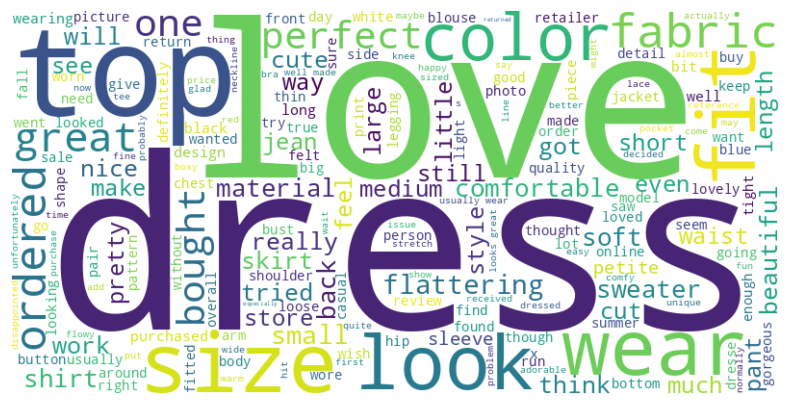

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all review texts
text = " ".join(data['Review.Text'].dropna())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 2. Make a TDM & TF-IDF Matrix based on Review

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns

# TDM
vectorizer_tdm = CountVectorizer(stop_words='english')
tdm = vectorizer_tdm.fit_transform(data['Review.Text'].dropna())

# TF-IDF
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
tfidf = vectorizer_tfidf.fit_transform(data['Review.Text'].dropna())


## 3. Perform Customer Segmentation using cosine Similarity

In [ ]:
from sklearn.cluster import KMeans

# Recheck and preprocess the data to match lengths
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
tfidf = vectorizer_tfidf.fit_transform(data['Review.Text'].dropna())

# Recompute clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf)

# Assign clusters to the cleaned dataset
data_cleaned = data.dropna(subset=['Review.Text']).reset_index(drop=True)
data_cleaned['Cluster'] = clusters

## 4. Build a Machine learning model to predict rating using Review

In [ ]:
# Drop rows with missing Review.Text values
data_cleaned = data.dropna(subset=['Review.Text']).reset_index(drop=True)

# Create feature matrix (X) and target variable (y) from cleaned data
X = vectorizer_tfidf.fit_transform(data_cleaned['Review.Text'])
y = data_cleaned['Rating']

In [ ]:
print(X.shape[0])  # Number of rows in the feature matrix
print(len(y))      # Number of rows in the target variable

22641
22641


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape)  # Feature matrix dimensions
print(y.shape)  # Target variable dimensions

(22641, 13855)
(22641,)


In [ ]:
print(data.isnull().sum())  # Check for missing values in each column

Unnamed: 0                    0
Clothing.ID                   0
Age                           0
Title                      3810
Review.Text                 845
Rating                        0
Recommended.IND               0
Positive.Feedback.Count       0
Division.Name                14
Department.Name              14
Class.Name                   14
dtype: int64


In [ ]:
data_cleaned = data.dropna(subset=['Review.Text', 'Rating']).reset_index(drop=True)

In [ ]:
X = vectorizer_tfidf.fit_transform(data_cleaned['Review.Text'])
y = data_cleaned['Rating']

In [ ]:
print(X.shape)  # Verify dimensions of the feature matrix
print(len(y))   # Verify the length of the target variable

(22641, 13855)
22641


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.59


## Finished